In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [2]:
uploaded = files.upload()

Saving time_series.csv to time_series.csv


In [3]:
df = pd.read_csv("time_series.csv")

In [4]:
df.head()

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    204 non-null    object 
 1   value   204 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.3+ KB


In [6]:
# 일단 이 데이터가 타임시리즈가 맞는지 확인
#결측치 확인
df.isnull().sum() # 없음

,0
date,0
value,0


In [7]:
df["date"] = pd.to_datetime(df["date"])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    204 non-null    datetime64[ns]
 1   value   204 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.3 KB


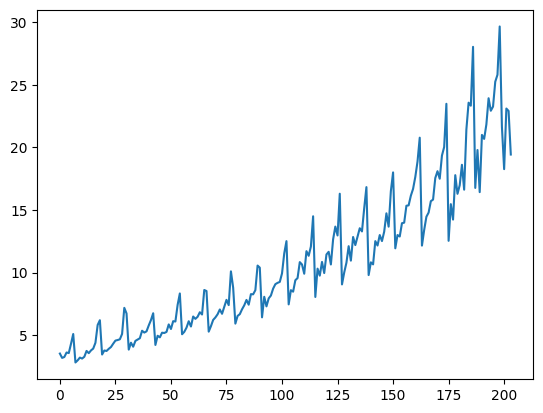

In [9]:
# 그리기
plt.plot(df["value"])

In [10]:
# seasonality 확인
# year는 year대로, month
df["year"] = [d.year for d in df.date]
df["month"] = [d.strftime("%b") for d in df.date]

In [11]:
df.head()

,date,value,year,month
0,1991-07-01,3.526591,1991,Jul
1,1991-08-01,3.180891,1991,Aug
2,1991-09-01,3.252221,1991,Sep
3,1991-10-01,3.611003,1991,Oct
4,1991-11-01,3.565869,1991,Nov


<Axes: xlabel='month', ylabel='value'>

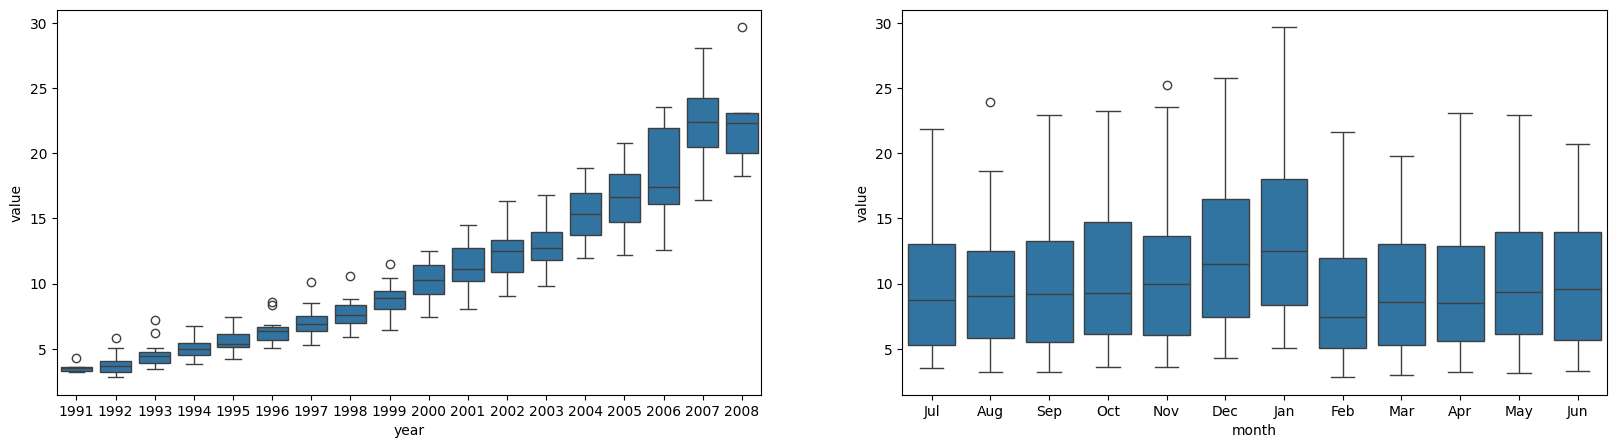

In [12]:
fig, ax = plt.subplots(1, 2, figsize = (20, 5))
sns.boxplot(x = "year", y = "value", data = df, ax = ax[0])
sns.boxplot(x = "month", y = "value", data = df, ax = ax[1])
# 91년에 6새월간의 데이터가 없기에 다른 년과 1대1로 비교하기엔 무리
# 91년도 7월부터 시작하기에 month가 7월부터 나옴
# 결론 전부 비교하는것은 무리
# => 91년과 2008년을 제외

In [13]:
# ~ : 제외한 나머지
df_m = df.loc[~df.year.isin([1991, 2008]), :]
df_m

,date,value,year,month
6,1992-01-01,5.088335,1992,Jan
7,1992-02-01,2.814520,1992,Feb
8,1992-03-01,2.985811,1992,Mar
9,1992-04-01,3.204780,1992,Apr
10,1992-05-01,3.127578,1992,May
...,...,...,...,...
193,2007-08-01,23.930204,2007,Aug
194,2007-09-01,22.930357,2007,Sep
195,2007-10-01,23.263340,2007,Oct
196,2007-11-01,25.250030,2007,Nov


<Axes: xlabel='month', ylabel='value'>

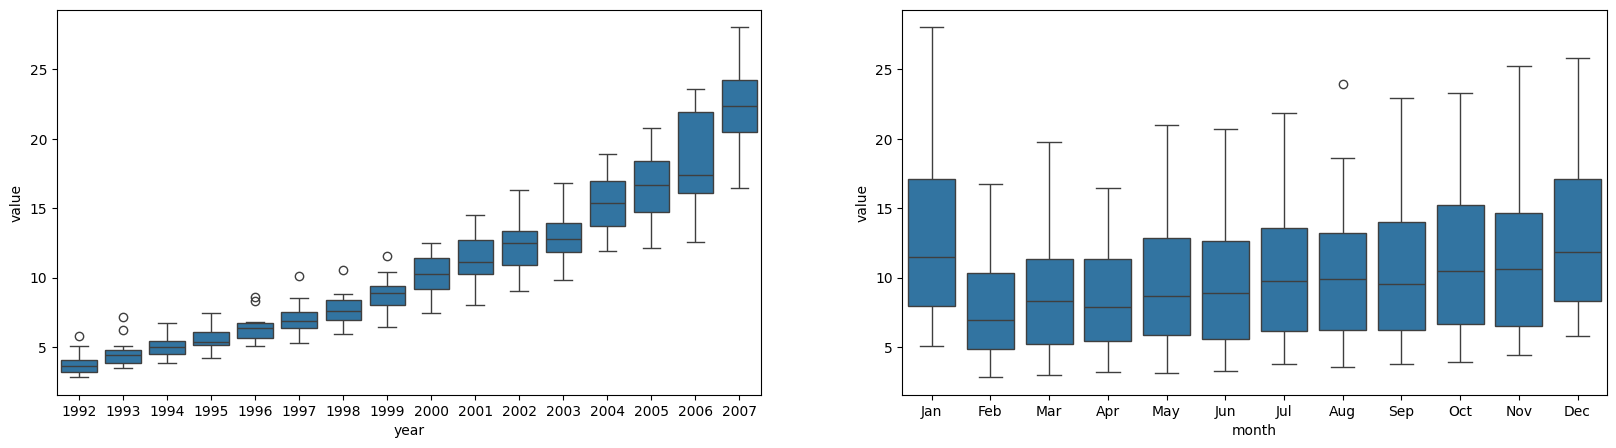

In [14]:
# 1991 && 2008 제외
fig, ax = plt.subplots(1, 2, figsize = (20, 5))
sns.boxplot(x = "year", y = "value", data = df_m, ax = ax[0])
sns.boxplot(x = "month", y = "value", data = df_m, ax = ax[1])
# 년은 점점 증가하는 추세
# 1월에 피크를 찍고 월별로 특이점이 나타난다
# 계절성을 가진 데이터는 그냥 plot을 그렸을 때 빗금쳐진거같이

# 시계열 데이터 구성

**Base Level + Trend + Seasonality + Error**


e.g. 실업률 제로 불가능, 아프거나 원하지 않아서 실업상태인 2% 존재 = base level


trend 올라가는 추세


seasonality 피크

error 기타 아웃라이어들

Trend:
- an increasing / a decreasing trend

e.g. monotoning ~

Seasonality:
- 어떤 연도나 기간에 피크를 찍고 내려오는 패턴이 여러해 내려오는 것

Cycle vs Seasonal
- business cycle

Error:
-

# Decompose a time series into its components

In [15]:
# base level trend seasonality 같은걸로 나눠

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [17]:
df = pd.read_csv("time_series.csv")
df.head()

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


In [18]:
df["date"] = pd.to_datetime(df["date"])

In [19]:
# decompose하기 쉽게 date를 index로 설정
df.set_index("date", inplace = True)
df.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


In [20]:
result_add = seasonal_decompose(df["value"], model = "additive", extrapolate_trend = "freq") # 더하는 모델으로 decompose

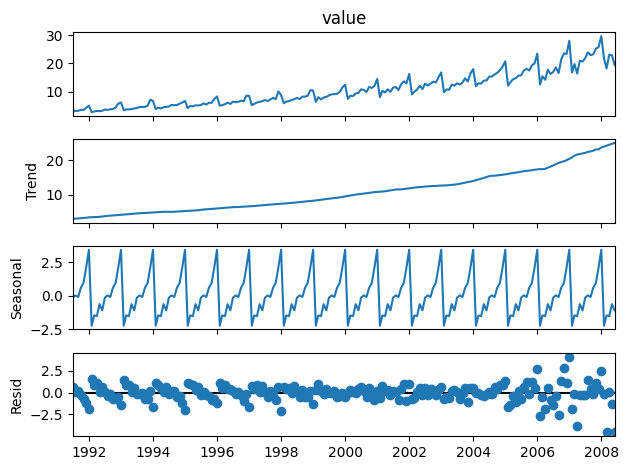

In [21]:
result_add.plot()
plt.show()
# residual이 에러
# residual 왜이렇게 큰가? std따라야하는데 2008년 -> 위에 boxplot

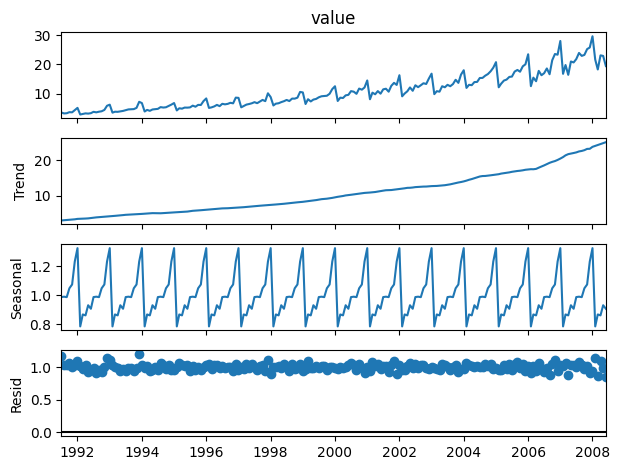

In [22]:
# 곱셈
result_multi = seasonal_decompose(df["value"], model = "multiplicative", extrapolate_trend = "freq") # 더하는 모델으로 decompose)
result_multi.plot()
plt.show()
# residual(error term)이 0에 근접해야하는데 1에 근접값

In [23]:
# 수치
result_add.seasonal

,seasonal
date,
1991-07-01,-0.140765
1991-08-01,0.027747
1991-09-01,-0.090361
1991-10-01,0.602876
1991-11-01,0.970698
...,...
2008-02-01,-2.232334
2008-03-01,-1.469959
2008-04-01,-1.518226


In [24]:
result_add.trend # extrapolate_trend = "freq"를 추가해야 nan으로 안나옴

,trend
date,
1991-07-01,3.060085
1991-08-01,3.124765
1991-09-01,3.189445
1991-10-01,3.254125
1991-11-01,3.318805
...,...
2008-02-01,24.037399
2008-03-01,24.298458
2008-04-01,24.559516


In [25]:
result_add.resid

,resid
date,
1991-07-01,0.607271
1991-08-01,0.028379
1991-09-01,0.153137
1991-10-01,-0.245998
1991-11-01,-0.723634
...,...
2008-02-01,-0.150780
2008-03-01,-4.563554
2008-04-01,0.066387


In [26]:
result_add.observed

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869
...,...
2008-02-01,21.654285
2008-03-01,18.264945
2008-04-01,23.107677


In [27]:
# 한꺼번에 볼수 있게
df_decompose = pd.concat([result_add.observed, result_add.trend, result_add.seasonal, result_add.resid], axis = 1)
# axis = 1 병렬로 오른쪽으로 묶어라

In [28]:
df_decompose

,value,trend,seasonal,resid
date,,,,
1991-07-01,3.526591,3.060085,-0.140765,0.607271
1991-08-01,3.180891,3.124765,0.027747,0.028379
1991-09-01,3.252221,3.189445,-0.090361,0.153137
1991-10-01,3.611003,3.254125,0.602876,-0.245998
1991-11-01,3.565869,3.318805,0.970698,-0.723634
...,...,...,...,...
2008-02-01,21.654285,24.037399,-2.232334,-0.150780
2008-03-01,18.264945,24.298458,-1.469959,-4.563554
2008-04-01,23.107677,24.559516,-1.518226,0.066387


In [29]:
df_decompose_multi = pd.concat([result_multi.observed, result_multi.trend, result_multi.seasonal, result_multi.resid], axis = 1)
df_decompose_multi

,value,trend,seasonal,resid
date,,,,
1991-07-01,3.526591,3.060085,0.987845,1.166629
1991-08-01,3.180891,3.124765,0.990481,1.027745
1991-09-01,3.252221,3.189445,0.987476,1.032615
1991-10-01,3.611003,3.254125,1.048329,1.058513
1991-11-01,3.565869,3.318805,1.074527,0.999923
...,...,...,...,...
2008-02-01,21.654285,24.037399,0.785976,1.146165
2008-03-01,18.264945,24.298458,0.868249,0.865756
2008-04-01,23.107677,24.559516,0.861883,1.091662


In [34]:
#3.52 #위 경우엔 add로 하는 게 낫다 이렇게 나오니까 91 2008년 뺀다
df_decompose_multi.iloc[0, 1] * df_decompose_multi.iloc[0, 2] * df_decompose_multi.iloc[0, 3]

3.526591

In [35]:
df.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869
